### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [5]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Only following columns have null values
#car                     12576
#Bar                       107
#CoffeeHouse               217
#CarryAway                 151
#RestaurantLessThan20      130
#Restaurant20To50          189

#The car column is not relevant for the analysis and can be safely ignored, even though it has only 108 non-null onjects nout of a total 12684
#The other columns with null values are Bar (107), CoffeeHouse (217), CarryAway (151), RestaurantLessThan20 (130) and Restaurant20To50 (189).
#The Maximum number of rows corresponding to null values in columns Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 
#is the sum of individual counts of null values in each of these columns, which is 794, which is approximately 6.26% of the rows. 
#Note that the actual count of rows with at least one of these columns having null values will be less than and equal to 794, as some rows may have
#All these rows can be safely dropped without significantly impacting the analysis
#null values in more than one column. But such an analysis is not really necessary as the maximum number is about 6.25% of the total number of rows.


3. Decide what to do about your missing data -- drop, replace, other...
4. Drop the null values. Replacing arbitrarily based upon distribution of counts in each column is another option which will lead to the similar results. Create a new dataframe data1


4. What proportion of the total observations chose to accept the coupon?



In [133]:
## STEP 1

# data1 is the new dataframe used for the rest of the analysis after dropping the null values

data1 = data.dropna(subset=[col for col in data.columns if col != 'car'])
data1.info()
# y-count1 is the count of all rowws (coupons) that were accepted (Y = 1)
#
y_count1 = sum(data1.query("Y == 1")['Y'])
print(y_count1)
# 
# Print total count of coupons in data1
print(data1.shape[0])
#
# total_acc_rt = ratio of y_count1 and total number of rows in data1
# we will proceed with data1 as the cleaned up dataframe version
total_acc_rt = y_count1/data1.shape[0]
#
print("Acceptance rate = ", total_acc_rt)


<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12079 non-null  ob

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Bar'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

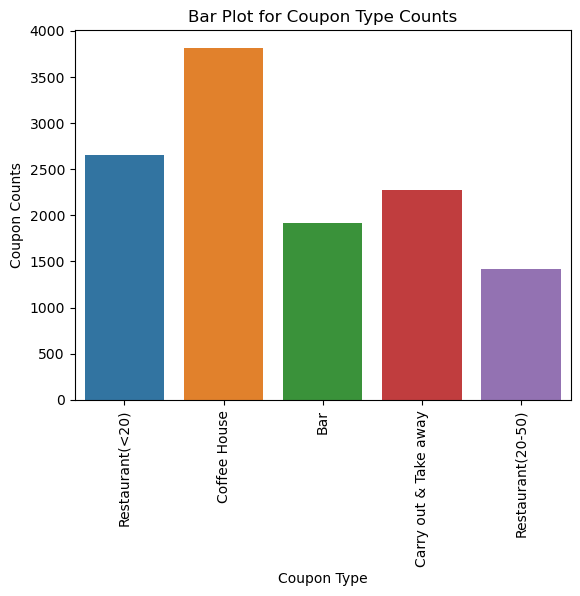

In [87]:
## STEP 2 (Plot bar plot of counts of coupons of each coupon-type)
##
sns.countplot(data = data1, x='coupon', hue='coupon')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Counts')
plt.title('Bar Plot for Coupon Type Counts')
plt.xticks(rotation = 90)


6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature Histogram')

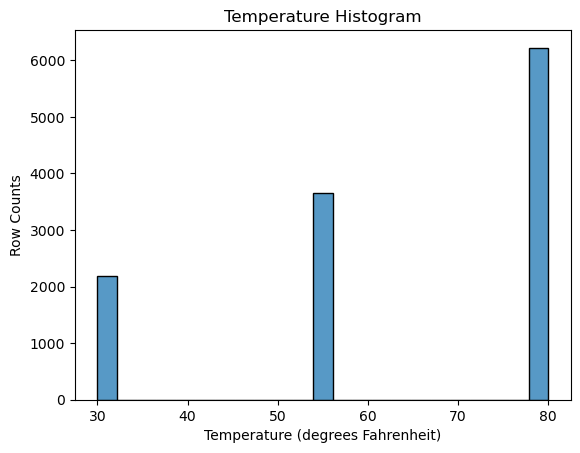

In [107]:
## STEP 3 (Create a histogram for the temperature column)
##
sns.histplot(data=data1, x='temperature')
plt.xlabel('Temperature (degrees Fahrenheit)')
plt.ylabel('Row Counts')
plt.title('Temperature Histogram')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [111]:
## STEP 4
#
## Select coupon type as Bar excluding all other coupon types
data_bar = data1.query("coupon == 'Bar'")

# Number of Bar coupons in data1 is given by data_bar.shape[0]
data_bar.shape[0]


1913

2. What proportion of bar coupons were accepted?


In [115]:
## STEP 5 - Calculate bar coupon acceptance rate
# bar_acc is the number of Bar coupons accepted (Y = 1) 
bar_acc = (data_bar.query("Y == 1")['Bar']).count()

# bar_acc_rt is the fraction of bar coupons that were accepted by the passengers (about 41%)
bar_acc_rt = bar_acc / data_bar.shape[0]

print(bar_acc)
print(bar_acc_rt)

# 

788
0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [119]:
## STEP 6 - compare acceptance rates for the categories below:
# 1. bar_acc_le3 = count of passengers who went to a bar 3 or fewer times a month
# 2. bar_acc_gt3 = count of passengers who went to a bar more than 3 times a month
# 3. bar_acc_never = count of passengers who never went to bar

bar_acc_le3 = (data_bar.query("(Bar == 'less1' | Bar == '1~3') & Y == 1")['Bar']).count()
bar_acc_le3_rt = bar_acc_le3 / bar_acc
bar_acc_gt3 = (data_bar.query("(Bar == '4~8' | Bar == 'gt8') & Y == 1")['Bar']).count()
bar_acc_gt3_rt = bar_acc_gt3 / bar_acc

bar_acc_never = (data_bar.query("Bar == 'never' & Y == 1")['Bar']).count()
bar_acc_never_rt = bar_acc_never / bar_acc

print(bar_acc_le3)
print(bar_acc_gt3)
print(bar_acc_never)
print(bar_acc_le3_rt)
print(bar_acc_gt3_rt)
print(bar_acc_never_rt)


492
147
149
0.6243654822335025
0.1865482233502538
0.18908629441624367


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [121]:
## STEP 7 - Compare acceptance rates for drivers who visit bar > 1 times a month and are > 25 years old v/s all other drivers
#

age_gt25 = ['26', '31', '36', '41', '46', '50plus']
bargt1 = ['less1', 'never']

bar_gt1_gt25yr = (data_bar.query("Bar not in @bargt1 & age in @age_gt25 & Y == 1"))['Bar'].count()
bar_all_oth = (data_bar.query("(Bar in @bargt1 | age not in @age_gt25) & Y == 1"))['Bar'].count()

bar_gt1_gt25yr_rt = bar_gt1_gt25yr / bar_acc
bar_all_oth_rt = bar_all_oth / bar_acc

print(bar_all_oth)
print(bar_gt1_gt25yr)
print(bar_gt1_gt25yr_rt)
print(bar_all_oth_rt)


510
278
0.35279187817258884
0.6472081218274112


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [123]:
## STEP 8 - Similar acceptance rate analysis as in STEP 6 for the following categories of drivers
## - drivers who visit bar > 1 times a month and no kids as passenger
## - drivers who visit bar > 1 times a month and had occupations other than farming, fishing, or forestry
#

excl_occlist = ['farming', 'fishing', 'forestry']
bar_gt1_nokid =  (data_bar.query("Bar != 'less1' & Bar != 'never' & not passanger.str.contains('Kid')"))['Bar'].count()
bar_gt1_occlist = (data_bar.query("Bar != 'less1' & Bar != 'never' & occupation not in @excl_occlist"))['Bar'].count()
bar_gt1_nokid_rt = bar_gt1_nokid / bar_acc
bar_gt1_occlist_rt = bar_gt1_occlist / bar_acc
print(bar_gt1_nokid)
print(bar_gt1_occlist)
print(bar_gt1_nokid_rt)
print(bar_gt1_occlist_rt)

530
572
0.6725888324873096
0.7258883248730964


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [125]:
## temporary calculation - can be ignored

under_30 = ['21', '26']
bar_under_30 = (data_bar.query("age in @under_30"))['Bar'].count()
print(bar_under_30)

765


In [127]:
## STEP 9 - Comapre the acceptance rates of the following three types of driver categories

#- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
#- go to bars more than once a month and are under the age of 30 *OR*
#- go to cheap restaurants more than 4 times a month and income is less than 50K.

under_30 = ['21', '26']
bar_gt1_nokid_nowidow = (data_bar.query("Bar != 'less1' & Bar != 'never' & not passanger.str.contains('Kid') & maritalStatus != 'Widowed'"))['Bar'].count() 
print(bar_gt1_nokid_nowidow)

bar_gt1_under30 = (data_bar.query("Bar != 'less1' & Bar != 'never' & not passanger.str.contains('Kid') & age in @under_30"))['Bar'].count()
print(bar_gt1_under30)

gt4 = ['4~8', 'gt8']
less50k = ['$12500 - $24999', '$25000 - $37499', '$25000 - $37499', 'Less than $12500']
cheap_gt4_less50k = (data_bar.query("RestaurantLessThan20 in @gt4 & income in @less50k"))['Bar'].count()
print(cheap_gt4_less50k)

bar_gt1_nokid_nowidow_rt = bar_gt1_nokid_nowidow / bar_acc
bar_gt1_under30_rt = bar_gt1_under30 / bar_acc
cheap_gt4_less50k_rt = cheap_gt4_less50k / bar_acc

print(bar_gt1_nokid_nowidow_rt)
print(bar_gt1_under30_rt)
print(cheap_gt4_less50k_rt)

530
309
243
0.6725888324873096
0.39213197969543145
0.3083756345177665


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
## Please see the README.docx attached with the submission for item 7 above

Acceptance rate =  0.5693352098683666
Ignore coupon rate =  0.4306647901316334
Bar acceptance rate =  0.41191845269210664
Bar acceptance with minor passenger =  0.050761421319796954
Bar acceptance with partner =  0.1281725888324873
0.46207497820401044
0.4763335837716003
0.5950421831059265
  weather  acc_rate
0   Rainy  0.462075
1   Snowy  0.476334
2   Sunny  0.595042


Text(0.5, 1.0, 'Bar Plot of Acceptnace rate v/s Weather Type')

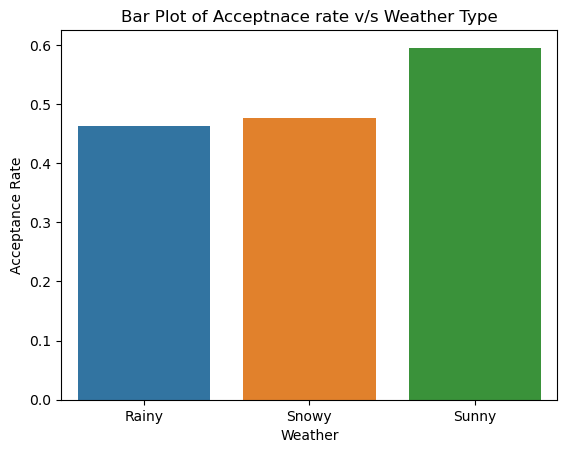

In [237]:
## STEP 10 - 

## Q1. Would you accept that coupon and take a short detour to the restaurant?
## The answer given below is for all types of esatblishments taken together
## the assumption here is that since the coupon expiration is either 2 hours or 1 day, the acceptance implies taking a detour
## This was computed in STEP 1 as total_acc_rt
print("Acceptance rate = ", total_acc_rt)
#data1.info()

## Q2. Would you accept the coupon but use it on a subsequent trip?
## This cannot be determined, as additional information for such a determination is not available.

## Q3. Would you ignore the coupon entirely?
## This is 1 - total_acc_rt
print("Ignore coupon rate = ", 1 - total_acc_rt)

## Q4. What if the coupon was for a bar instead of a restaurant?
## This was calculated as bar_acc in STEP 5
print("Bar acceptance rate = ", bar_acc_rt)

## Q5. What about a coffee house?
## This is given in the Independent Investigation section below

## Q6. Would you accept a bar coupon with a minor passenger in the car? This is computed as bar_acc_kid_rt
bar_acc_kid =  (data_bar.query("passanger.str.contains('Kid') & Y == 1"))['Bar'].count()
bar_acc_kid_rt = bar_acc_kid / bar_acc
print("Bar acceptance with minor passenger = ", bar_acc_kid_rt)

## Q7. What about if it was just you and your partner in the car? 
bar_acc_partner =  (data_bar.query("passanger.str.contains('Partner') & Y == 1"))['Bar'].count()
bar_acc_partner_rt = bar_acc_partner / bar_acc
print("Bar acceptance with partner = ", bar_acc_partner_rt)

## Q8. Would weather impact the rate of acceptance?
## this is shown in the bar plot below. All restaurent types are considered here.

weather_acc_coupon =  (data1.query("Y == 1"))['weather'].count()
weather_coupon = data1['weather'].count()
weather_acc_rt = weather_acc_coupon / weather_coupon

weather_acc_rain =  (data1.query("Y == 1 & weather == 'Rainy'"))['weather'].count()
weather_rain = (data1.query("weather == 'Rainy'"))['weather'].count()
weather_acc_rain_rt = weather_acc_rain / weather_rain
print(weather_acc_rain_rt)

weather_acc_snow =  (data1.query("Y == 1 & weather == 'Snowy'"))['weather'].count()
weather_snow = (data1.query("weather == 'Snowy'"))['weather'].count()
weather_acc_snow_rt = weather_acc_snow / weather_snow
print(weather_acc_snow_rt)

weather_acc_sun =  (data1.query("Y == 1 & weather == 'Sunny'"))['weather'].count()
weather_sun = (data1.query("weather == 'Sunny'"))['weather'].count()
weather_acc_sun_rt = weather_acc_sun / weather_sun
print(weather_acc_sun_rt)

wthr = {'weather': ['Rainy', 'Snowy', 'Sunny'], 'acc_rate': [weather_acc_rain_rt, weather_acc_snow_rt, weather_acc_sun_rt]}
wthr_df = pd.DataFrame(wthr)
print(wthr_df)

sns.barplot(data = wthr_df, x='weather', y='acc_rate', hue='weather')

plt.xlabel('Weather')
plt.ylabel('Acceptance Rate')
plt.title('Bar Plot of Acceptnace rate v/s Weather Type')
#plt.xticks(rotation = 90)



      destination  passanger   weather  temperature    coupon  expiration  \
time                                                                        
10AM     0.607970   0.607970  0.607970     0.607970  0.607970    0.607970   
10PM     0.515502   0.515502  0.515502     0.515502  0.515502    0.515502   
2PM      0.660752   0.660752  0.660752     0.660752  0.660752    0.660752   
6PM      0.582846   0.582846  0.582846     0.582846  0.582846    0.582846   
7AM      0.503968   0.503968  0.503968     0.503968  0.503968    0.503968   

        gender       age  maritalStatus  has_children  ...  CoffeeHouse  \
time                                                   ...                
10AM  0.607970  0.607970       0.607970      0.607970  ...     0.607970   
10PM  0.515502  0.515502       0.515502      0.515502  ...     0.515502   
2PM   0.660752  0.660752       0.660752      0.660752  ...     0.660752   
6PM   0.582846  0.582846       0.582846      0.582846  ...     0.582846   
7AM   0.50

Text(0.5, 1.0, 'Bar Plot of Acceptnace rate v/s Time of the Day')

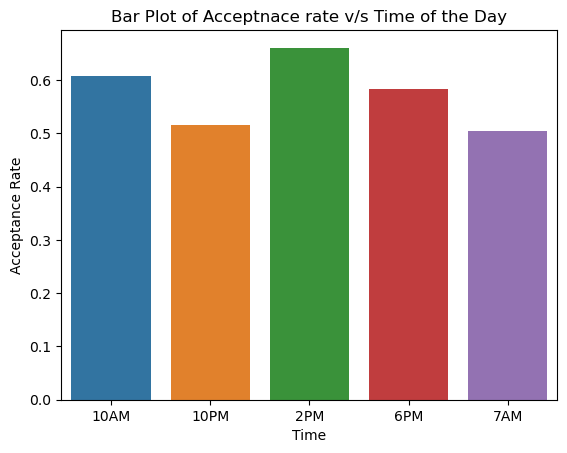

In [239]:
## Q9. What about the time of day?
# I have used a different approach using groupby to get the answer instead of computing individual rates for each time

condition = data1['Y'] == 1

# Group by 'time' where the condition is True (Y = 1)
time_acc = data1[condition].groupby('time').count()
time_tot = data1.groupby('time').count()

time_df = time_acc / time_tot
time_df.reset_index()
print(time_df)

## each column has the acceptance rates for various times, which appear as rows
## use any column (for example coupon) to plot the barplot of acceptance rate v/s time

sns.barplot(data = time_df, x='time', y='coupon', hue='time')

plt.xlabel('Time')
plt.ylabel('Acceptance Rate')
plt.title('Bar Plot of Acceptnace rate v/s Time of the Day')
#plt.xticks(rotation = 90)

## Note - the time axis does not contain time in the increasing order from left to right
## The same can be achieved by adding a numeric column with military time (from 0000 hours to 2359) corresponding to time

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  